In [1]:
import tensorflow as tf 
from tensorflow.keras import  Sequential 
from tensorflow.keras.layers import  Dense 
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import  StandardScaler 
from sklearn.model_selection import train_test_split 

import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# 1️⃣ Load dataset
data=fetch_california_housing()

X,y=data.data,data.target

In [3]:
# 2️⃣ Split into training and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [4]:
# 3️⃣ Scale the features
from sklearn.preprocessing import  StandardScaler 
scalar=StandardScaler()

X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit(X_test)



In [5]:
# 4️⃣ Build the neural network model

model=Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='linear')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#4128 8 * 8 64
#4128 64 * 64 32
#4128 32 * 32 1

# Compile the model

from tensorflow.keras.losses import  MeanSquaredError


model.compile(optimizer='adam',loss=MeanSquaredError(), metrics=['mae'])



In [7]:
# 5️⃣ Train the model

history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 1.7678 - mae: 0.9145 - val_loss: 0.4845 - val_mae: 0.4940
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.4458 - mae: 0.4763 - val_loss: 0.4471 - val_mae: 0.4579
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.4005 - mae: 0.4526 - val_loss: 0.3997 - val_mae: 0.4403
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.3795 - mae: 0.4376 - val_loss: 0.3740 - val_mae: 0.4409
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.3582 - mae: 0.4203 - val_loss: 0.3632 - val_mae: 0.4325
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3337 - mae: 0.4089 - val_loss: 0.3397 - val_mae: 0.4086
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3323 - mae: 0.4058 - val_loss: 0.3651 - val_mae: 0.4276
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.3606 - mae: 0.4093 - val_loss: 0.3330 - val_mae: 0.4047
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 

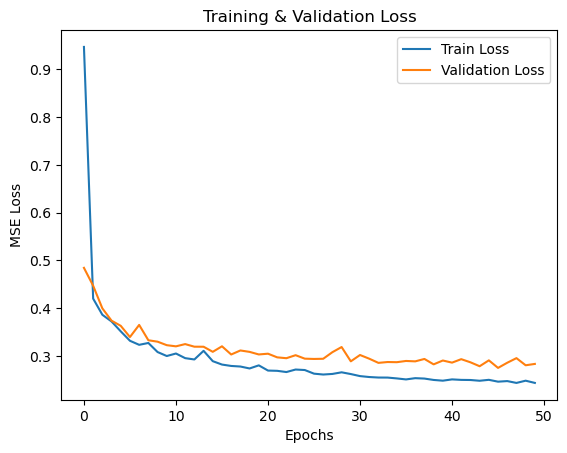

In [8]:


# 6️⃣ Plot the loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

In [11]:
# Predict prices on test set
y_pred = model.predict(X_test_scaled)

# Compare actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

ValueError: Unrecognized data type: x=StandardScaler() (of type <class 'sklearn.preprocessing._data.StandardScaler'>)

In [10]:
X_test_scaled

StandardScaler()